# Dado Cuántico con Simulación de Ruido en PyQuil

## Proyecto de Computación Cuántica

Este notebook explora cómo el ruido cuántico afecta a un dado cuántico de 8 caras implementado con PyQuil.

---
## Sección 1: Introducción al Dado Cuántico

### ¿Qué es un dado cuántico?

Un **dado clásico de 8 caras** tiene una probabilidad uniforme de **1/8 (12.5%)** para cada uno de sus resultados posibles. En computación cuántica, podemos simular este dado usando **3 qubits**, ya que 2³ = 8 estados posibles.

### ¿Cómo funciona?

1. **Superposición**: Cada qubit se coloca en superposición usando la puerta Hadamard (H)
2. **Medición**: Al medir los 3 qubits, obtenemos uno de los 8 estados posibles
3. **Mapeo**: Convertimos el resultado binario a un número del 1 al 8

Los 8 resultados posibles en binario:
- 000 → 1
- 001 → 2
- 010 → 3
- 011 → 4
- 100 → 5
- 101 → 6
- 110 → 7
- 111 → 8

### ¿Por qué es interesante para estudiar el ruido?

El dado cuántico es un **excelente benchmark** porque:
- **Sin ruido**: Esperamos una distribución perfectamente uniforme (12.5% cada cara)
- **Con ruido**: Cualquier desviación de la uniformidad es fácilmente observable
- **Simple de implementar**: Solo 3 qubits y puertas Hadamard

### ¿Qué esperamos ver?

- **Sin ruido**: Todas las caras aparecen aproximadamente el mismo número de veces
- **Con ruido**: La distribución se sesga, algunas caras aparecen más frecuentemente que otras

---
## Sección 2: Teoría del Ruido Cuántico

### ¿Qué es el ruido cuántico?

El **ruido cuántico** es cualquier interacción no deseada entre los qubits y su entorno que degrada la información cuántica. En sistemas cuánticos reales, el ruido es inevitable y representa uno de los mayores desafíos para construir computadores cuánticos prácticos.

A diferencia del ruido clásico (que solo afecta los bits durante la medición), el ruido cuántico afecta la **superposición** y el **entrelazamiento** durante todo el cálculo, no solo al final.

### Tipos principales de ruido

#### 1. Decoherencia T1 (Relajación de Energía)

- **Qué es**: El qubit pierde energía y "decae" del estado |1⟩ al estado |0⟩
- **Causa física**: Emisión de fotones al entorno
- **Tiempo T1**: Tiempo característico en que el qubit mantiene su excitación
- **Efecto en el dado**: Sesgo hacia las caras con más ceros (1-4), ya que los qubits tienden a relajarse a |0⟩

#### 2. Decoherencia T2 (Pérdida de Fase)

- **Qué es**: Se pierde la información de la **fase relativa** entre |0⟩ y |1⟩
- **Causa física**: Fluctuaciones en el entorno electromagnético
- **Tiempo T2**: Tiempo característico en que se mantiene la coherencia de fase
- **Relación**: Siempre T2 ≤ 2×T1 (el ruido de fase no puede ser menor que el de amplitud)
- **Efecto en el dado**: Destruye la superposición uniforme, causando resultados más aleatorios

#### 3. Ruido de Lectura (Readout Errors)

- **Qué es**: Errores al medir el estado del qubit
- **Causa física**: Imperfecciones en los circuitos de medición
- **Parámetros**:
  - p(0|0): probabilidad de medir correctamente un |0⟩
  - p(1|1): probabilidad de medir correctamente un |1⟩
- **Efecto en el dado**: Algunos resultados se "confunden" con otros durante la medición

### ¿Cómo afecta al dado cuántico?

En un dado ideal, cada qubit está en la superposición perfecta:

|ψ⟩ = (|0⟩ + |1⟩)/√2 para cada qubit

El ruido degrada esta superposición perfecta, causando que:
- La distribución deje de ser uniforme
- Algunas caras se vuelvan más probables que otras
- La aleatoriedad cuántica se pierda parcialmente

### Nota sobre la implementación

En este notebook, **simularemos el ruido manualmente** después de obtener los resultados ideales. Esto es pedagógicamente más claro que usar los modelos de ruido built-in de PyQuil, y nos permite entender exactamente qué hace cada tipo de ruido.

---
## Sección 3: Implementación del Dado Cuántico Sin Ruido

Comenzamos implementando el dado cuántico ideal, sin ningún tipo de ruido. Esto nos servirá como **línea base** para comparar los efectos del ruido.

In [ ]:
from pyquil import Program, get_qc
from pyquil.gates import H, MEASURE, Declare
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from scipy.stats import chisquare

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

✓ Importaciones completadas
✓ Usando NumPy 2.3.4


In [44]:
def crear_dado_cuantico_base():

    program = Program(
        Declare("ro", "BIT", 3),
        H(0),
        H(1),
        H(2),
        MEASURE(0, ("ro", 0)),
        MEASURE(1, ("ro", 1)),
        MEASURE(2, ("ro", 2)),
    ).wrap_in_numshots_loop(10000)
    
    return program

circuito_base = crear_dado_cuantico_base()
print(circuito_base)

DECLARE ro BIT[3]
H 0
H 1
H 2
MEASURE 0 ro[0]
MEASURE 1 ro[1]
MEASURE 2 ro[2]



In [ ]:
def binario_a_dado(resultado_binario):
    
    return int((resultado_binario[0] * 4 + resultado_binario[1] * 2 + resultado_binario[2] * 1) + 1)


def ejecutar_dado_sin_ruido(shots=10000):
    """Ejecuta el dado cuántico sin ruido"""
    qc = get_qc('3q-qvm')
    
    program = Program(
        Declare("ro", "BIT", 3),
        H(0),
        H(1),
        H(2),
        MEASURE(0, ("ro", 0)),
        MEASURE(1, ("ro", 1)),
        MEASURE(2, ("ro", 2)),
    ).wrap_in_numshots_loop(shots)
    
    executable = qc.compile(program)
    result = qc.run(executable)
    resultados_bits = result.get_register_map()['ro']
    
    # Convertir binarios a número (ahora serán int de Python)
    resultados_dado = [binario_a_dado(bits) for bits in resultados_bits]
    
    return resultados_dado

# Ejecutar el dado cuántico sin ruido
print("Dado cuántico sin ruido")
resultados_sin_ruido = ejecutar_dado_sin_ruido(10000)
print(f"{len(resultados_sin_ruido)} lanzamientos")
print(f"Primeros 20 resultados: {resultados_sin_ruido[:20]}")

Dado cuántico sin ruido
10000 lanzamientos

Primeros 20 resultados: [5, 7, 4, 6, 3, 2, 8, 5, 8, 8, 1, 8, 1, 2, 5, 6, 1, 8, 6, 7]


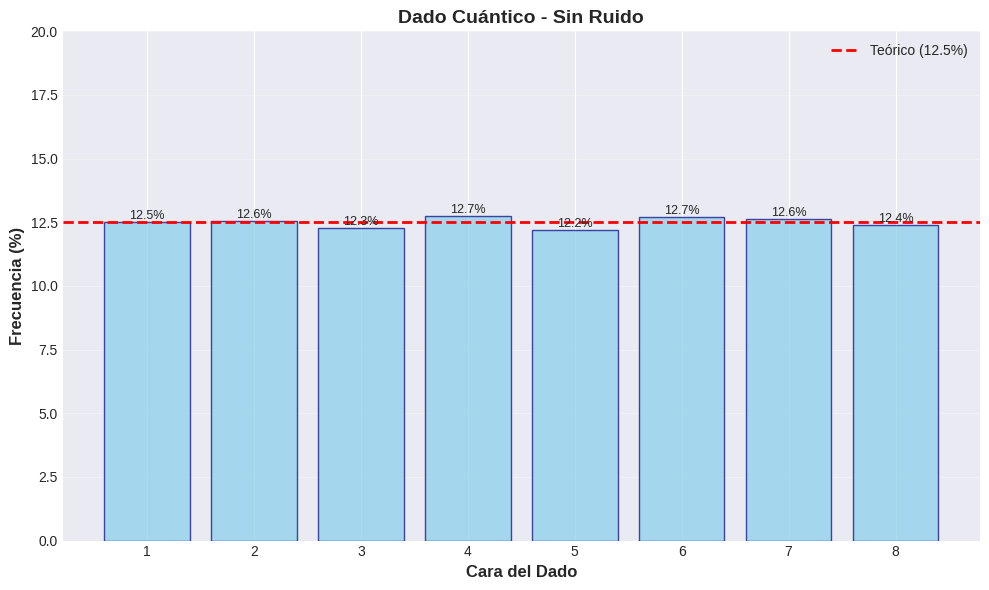


Frecuencias observadas:
Cara 1: 12.52%
Cara 2: 12.55%
Cara 3: 12.29%
Cara 4: 12.74%
Cara 5: 12.19%
Cara 6: 12.70%
Cara 7: 12.62%
Cara 8: 12.39%


In [51]:
def calcular_frecuencias(resultados):
    """
    Calcula las frecuencias de cada cara del dado.
    """
    contador = Counter(resultados)
    
    total = len(resultados)
    
    frecuencias = {}
    
    for i in range(1, 9):
        veces_que_salio = contador.get(i, 0)
        porcentaje = (veces_que_salio / total) * 100
        frecuencias[i] = porcentaje
    
    return frecuencias

def graficar_resultados_dado(resultados, titulo="Dado Cuántico", ax=None):

    frecuencias = calcular_frecuencias(resultados)
    caras = list(frecuencias.keys())
    porcentajes = list(frecuencias.values())
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    # Graficar barras
    bars = ax.bar(caras, porcentajes, color='skyblue', edgecolor='navy', alpha=0.7)
    
    # Línea del valor teórico (12.5%)
    ax.axhline(y=12.5, color='red', linestyle='--', linewidth=2, label='Teórico (12.5%)')
    
    # Configuración de ejes
    ax.set_xlabel('Cara del Dado', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frecuencia (%)', fontsize=12, fontweight='bold')
    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.set_xticks(caras)
    ax.set_ylim([0, 20])
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    # Añadir valores sobre las barras
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9)
    
    return ax

# Graficar resultados sin ruido
graficar_resultados_dado(resultados_sin_ruido, "Dado Cuántico - Sin Ruido")
plt.tight_layout()
plt.show()

# Mostrar estadísticas
frecuencias_sin_ruido = calcular_frecuencias(resultados_sin_ruido)
print("\nFrecuencias observadas:")
for cara, freq in frecuencias_sin_ruido.items():
    print(f"Cara {cara}: {freq:.2f}%")

### Análisis de resultados sin ruido

Como podemos observar, los resultados se distribuyen de manera **casi perfectamente uniforme** alrededor del 12.5% teórico. Las pequeñas variaciones que vemos son simplemente **fluctuaciones estadísticas** normales (ruido de muestreo).

Esto confirma que nuestro circuito cuántico funciona correctamente y que el simulador QVM es preciso cuando no hay ruido añadido.

---
## Sección 4: Implementación Con Ruido de Decoherencia

Ahora simularemos el **ruido de decoherencia** (T1 y T2) aplicándolo manualmente a los resultados. Este enfoque nos permite entender exactamente cómo el ruido afecta los estados cuánticos.

### Modelo de Ruido T1

El ruido T1 hace que los qubits en estado |1⟩ "decaigan" a |0⟩ con cierta probabilidad. La probabilidad de error depende de:
- El tiempo que tarda la operación (gate_time)
- El tiempo de relajación T1

**Probabilidad de relajación**: p = 1 - exp(-gate_time / T1)

Para nuestro dado, si un qubit está en |1⟩, tiene probabilidad `p` de convertirse en |0⟩.

In [52]:
def aplicar_ruido_t1(resultados_bits, T1, gate_time=200e-9):
    """
    Aplica ruido T1 (relajación) a los resultados.

    Los qubits en |1⟩ tienen probabilidad de decaer a |0⟩.
    """
    p_relax = 1 - np.exp(-gate_time / T1)

    resultados_ruidosos = []

    for bits in resultados_bits:
        nuevo_bits = bits.copy()

        for i in range(len(bits)):
            if bits[i] == 1:
                if np.random.random() < p_relax:
                    nuevo_bits[i] = 0

        resultados_ruidosos.append(nuevo_bits)

    return resultados_ruidosos

def simular_dado_con_decoherencia(T1, T2=None, gate_time=200e-9, shots=10000):
    """
    Simula el dado cuántico con ruido de decoherencia.

    Por simplicidad, solo simulamos T1 (el efecto dominante).
    """
    qc = get_qc('3q-qvm')

    program = Program(
        Declare("ro", "BIT", 3),
        H(0),
        H(1),
        H(2),
        MEASURE(0, ("ro", 0)),
        MEASURE(1, ("ro", 1)),
        MEASURE(2, ("ro", 2)),
    ).wrap_in_numshots_loop(shots)

    executable = qc.compile(program)
    result = qc.run(executable)
    resultados_bits = result.get_register_map()['ro']

    # Aplicar ruido T1
    resultados_ruidosos = aplicar_ruido_t1(resultados_bits, T1, gate_time)

    # Convertir a números del dado
    resultados_dado = [binario_a_dado(bits) for bits in resultados_ruidosos]

    return resultados_dado

In [53]:
# 3 tipo de ruido
niveles_ruido = {
    'Ruido Bajo (QPU actual)': {'T1': 30e-6, 'T2': 15e-6},
    'Ruido Medio': {'T1': 10e-6, 'T2': 5e-6},
    'Ruido Alto': {'T1': 1e-6, 'T2': 0.5e-6}
}

In [55]:
resultados_decoherencia = {}

for nivel, params in niveles_ruido.items():
    print(f"→ {nivel}: T1={params['T1']*1e6:.1f}μs, T2={params['T2']*1e6:.1f}μs")
    resultados = simular_dado_con_decoherencia(params['T1'], params['T2'])
    resultados_decoherencia[nivel] = resultados

→ Ruido Bajo (QPU actual): T1=30.0μs, T2=15.0μs
→ Ruido Medio: T1=10.0μs, T2=5.0μs
→ Ruido Alto: T1=1.0μs, T2=0.5μs


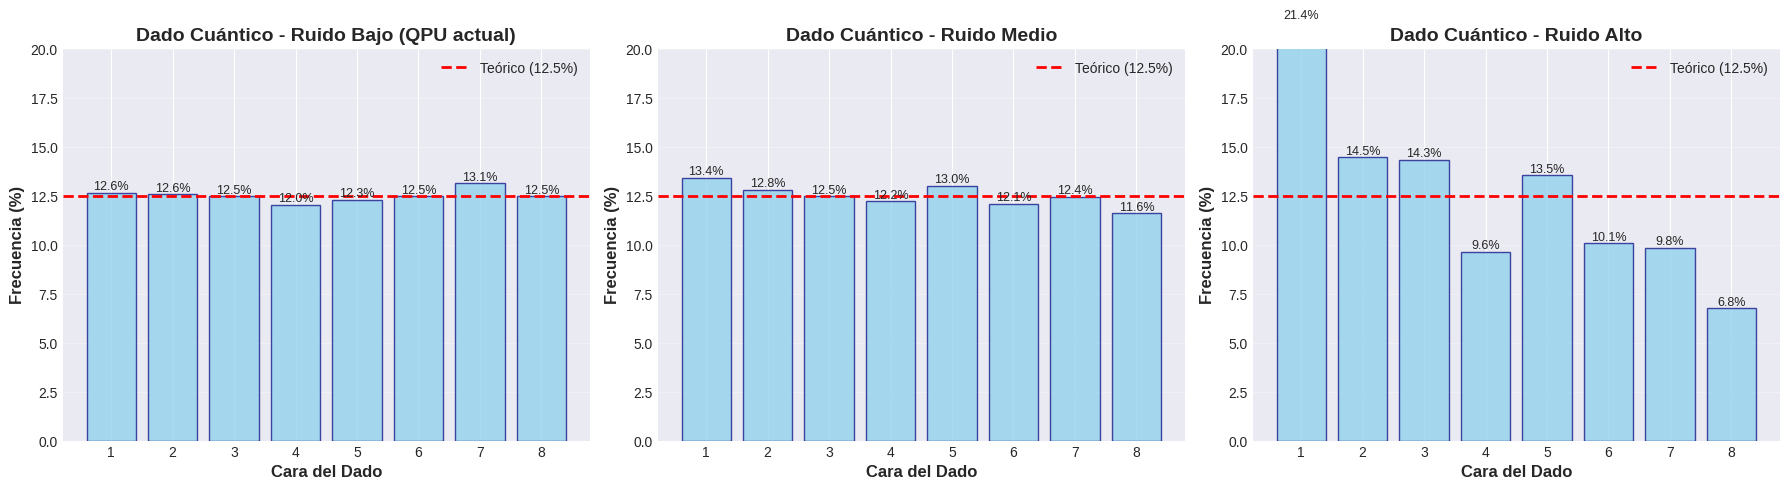


ANÁLISIS COMPARATIVO DE DECOHERENCIA

Ruido Bajo (QPU actual):
  Desviación estándar: 0.294%
  Máxima desviación del 12.5%: 0.620%

Ruido Medio:
  Desviación estándar: 0.532%
  Máxima desviación del 12.5%: 0.920%

Ruido Alto:
  Desviación estándar: 4.203%
  Máxima desviación del 12.5%: 8.880%



In [56]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (nivel, resultados) in enumerate(resultados_decoherencia.items()):
    graficar_resultados_dado(resultados, f"Dado Cuántico - {nivel}", ax=axes[idx])

plt.tight_layout()
plt.show()

# Mostrar estadísticas detalladas
print("\n" + "="*60)
print("ANÁLISIS COMPARATIVO DE DECOHERENCIA")
print("="*60 + "\n")

for nivel, resultados in resultados_decoherencia.items():
    frecuencias = calcular_frecuencias(resultados)
    valores = list(frecuencias.values())
    desv_std = np.std(valores)
    max_desv = max([abs(v - 12.5) for v in valores])
    
    print(f"{nivel}:")
    print(f"  Desviación estándar: {desv_std:.3f}%")
    print(f"  Máxima desviación del 12.5%: {max_desv:.3f}%")
    print()

### Observaciones sobre el ruido de decoherencia

Los resultados muestran cómo el ruido T1 afecta al dado cuántico:

1. **Ruido Bajo (típico de QPUs actuales)**: La distribución sigue siendo relativamente uniforme, con pequeñas desviaciones

2. **Ruido Medio**: Se empieza a observar un sesgo notable. Las caras con más bits en |0⟩ (caras 1-4) tienden a aparecer más frecuentemente debido a la relajación T1

3. **Ruido Alto**: La distribución se degrada significativamente. El efecto de relajación hacia |0⟩ es muy evidente

Este comportamiento es característico del ruido T1: los qubits "pierden energía" y tienden al estado fundamental |0⟩, sesgando los resultados.

---
## Sección 5: Implementación Con Ruido de Lectura

El **ruido de lectura** (readout noise) modela los errores que ocurren durante la medición de los qubits. Incluso si el estado cuántico es perfecto, la medición puede fallar.

### Matriz de confusión de lectura

Para cada qubit, definimos:
- **p(0|0)**: probabilidad de medir correctamente un |0⟩
- **p(1|1)**: probabilidad de medir correctamente un |1⟩

Los errores son:
- **p(1|0) = 1 - p(0|0)**: probabilidad de medir |1⟩ cuando es |0⟩
- **p(0|1) = 1 - p(1|1)**: probabilidad de medir |0⟩ cuando es |1⟩

La **fidelidad de lectura** típica en QPUs reales está entre 95-99%.

In [59]:
def aplicar_ruido_lectura(resultados_bits, p00=0.95, p11=0.95):

    resultados_ruidosos = []

    for bits in resultados_bits:
        nuevo_bits = bits.copy()

        for i in range(len(bits)):
            if bits[i] == 0:
                if np.random.random() > p00:
                    nuevo_bits[i] = 1
            else:
                if np.random.random() > p11:
                    nuevo_bits[i] = 0

        resultados_ruidosos.append(nuevo_bits)

    return resultados_ruidosos

def simular_dado_con_ruido_lectura(p00, p11, shots=10000):
    """
    Simula el dado cuántico con ruido de lectura.
    """
    qc = get_qc('3q-qvm')

    program = Program(
        Declare("ro", "BIT", 3),
        H(0),
        H(1),
        H(2),
        MEASURE(0, ("ro", 0)),
        MEASURE(1, ("ro", 1)),
        MEASURE(2, ("ro", 2)),
    ).wrap_in_numshots_loop(shots)

    executable = qc.compile(program)
    result = qc.run(executable)
    resultados_bits = result.get_register_map()['ro']

    resultados_ruidosos = aplicar_ruido_lectura(resultados_bits, p00, p11)
    resultados_dado = [binario_a_dado(bits) for bits in resultados_ruidosos]

    return resultados_dado

In [60]:
# Definir tres niveles de fidelidad de lectura
niveles_lectura = {
    'Alta Fidelidad (99%)': {'p00': 0.99, 'p11': 0.99},
    'Media Fidelidad (95%)': {'p00': 0.95, 'p11': 0.95},
    'Baja Fidelidad (85%)': {'p00': 0.85, 'p11': 0.85}
}

In [61]:
resultados_lectura = {}

for nivel, params in niveles_lectura.items():
    print(f"→ {nivel}: p(0|0)={params['p00']}, p(1|1)={params['p11']}")
    resultados = simular_dado_con_ruido_lectura(params['p00'], params['p11'])
    resultados_lectura[nivel] = resultados

→ Alta Fidelidad (99%): p(0|0)=0.99, p(1|1)=0.99
→ Media Fidelidad (95%): p(0|0)=0.95, p(1|1)=0.95
→ Baja Fidelidad (85%): p(0|0)=0.85, p(1|1)=0.85


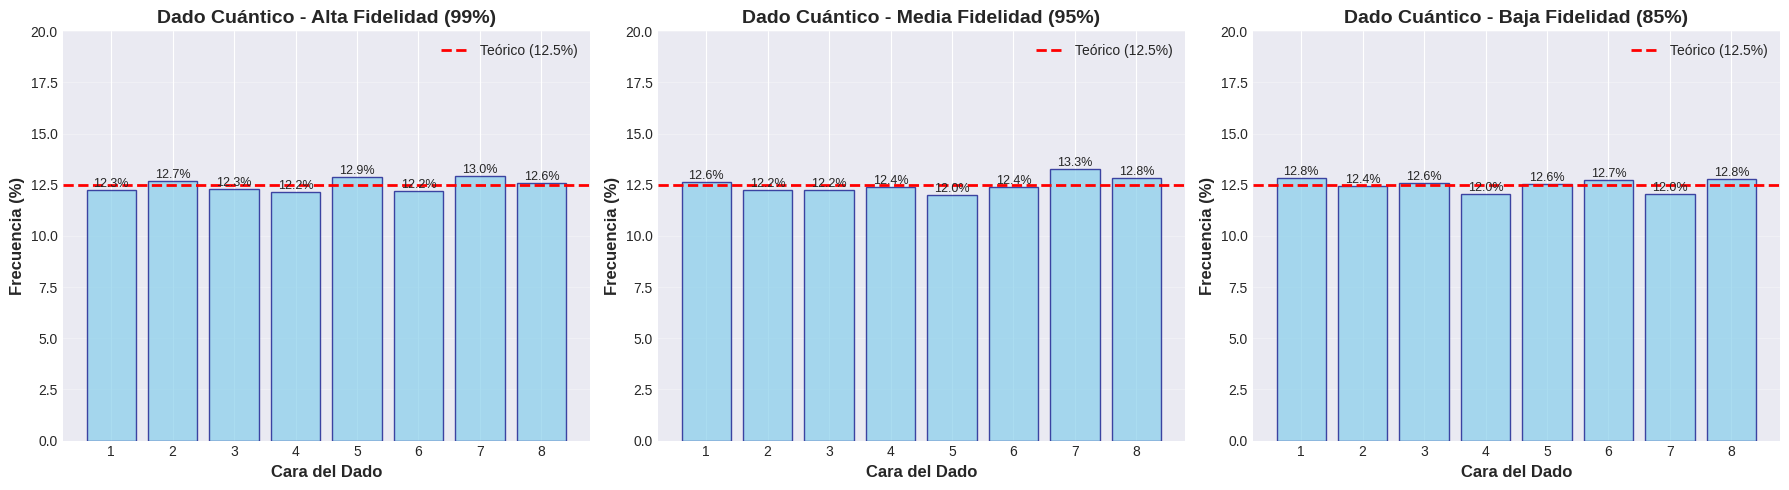


ANÁLISIS COMPARATIVO DE RUIDO DE LECTURA

Alta Fidelidad (99%):
  Desviación estándar: 0.294%
  Máxima desviación del 12.5%: 0.450%

Media Fidelidad (95%):
  Desviación estándar: 0.373%
  Máxima desviación del 12.5%: 0.770%

Baja Fidelidad (85%):
  Desviación estándar: 0.294%
  Máxima desviación del 12.5%: 0.460%



In [62]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (nivel, resultados) in enumerate(resultados_lectura.items()):
    graficar_resultados_dado(resultados, f"Dado Cuántico - {nivel}", ax=axes[idx])

plt.tight_layout()
plt.show()

# Mostrar estadísticas detalladas
print("\n" + "="*60)
print("ANÁLISIS COMPARATIVO DE RUIDO DE LECTURA")
print("="*60 + "\n")

for nivel, resultados in resultados_lectura.items():
    frecuencias = calcular_frecuencias(resultados)
    valores = list(frecuencias.values())
    desv_std = np.std(valores)
    max_desv = max([abs(v - 12.5) for v in valores])
    
    print(f"{nivel}:")
    print(f"  Desviación estándar: {desv_std:.3f}%")
    print(f"  Máxima desviación del 12.5%: {max_desv:.3f}%")
    print()

### Observaciones sobre el ruido de lectura

El ruido de lectura tiene un comportamiento diferente al de decoherencia:

1. **Alta Fidelidad (99%)**: Impacto mínimo, la distribución es casi uniforme

2. **Media Fidelidad (95%)**: Se observan desviaciones más notables, pero sin un patrón sistemático claro (a diferencia del sesgo hacia |0⟩ del ruido T1)

3. **Baja Fidelidad (85%)**: La distribución se degrada significativamente, con variaciones importantes entre caras

A diferencia del ruido de decoherencia, el ruido de lectura **no sesga sistemáticamente** hacia ciertas caras, sino que introduce errores más **aleatorios**. Sin embargo, dependiendo de si p00 ≠ p11, puede haber sesgos asimétricos.

---
## Conclusiones

El **Dado Cuántico de 8 caras** es un ejemplo pedagógico excelente para entender el ruido cuántico:

### Lo que aprendimos:

1. **Sin ruido**, el dado cuántico produce una distribución perfectamente uniforme, como esperamos teóricamente

2. **El ruido de decoherencia** (T1/T2) introduce un sesgo sistemático hacia el estado |0⟩, haciendo que ciertas caras sean más probables

3. **El ruido de lectura** introduce errores durante la medición, degradando la uniformidad de manera menos predecible

4. **La combinación de ambos** tipos de ruido degrada completamente la uniformidad del dado

5. **Los QPUs reales** operan con estos niveles de ruido constantemente, lo que hace crucial el desarrollo de:
   - Códigos de corrección de errores cuánticos
   - Técnicas de mitigación de errores
   - Hardware con mejor coherencia

### Reflexión final:

Este simple experimento del dado cuántico revela por qué la computación cuántica es tan desafiante: la información cuántica es **extremadamente frágil**. Cada interacción con el entorno degrada la superposición y el entrelazamiento que son la fuente del poder computacional cuántico.

El camino hacia computadores cuánticos útiles requiere no solo aumentar el número de qubits, sino fundamentalmente **reducir el ruido** y desarrollar técnicas robustas para manejarlo.

---

**Próximos pasos sugeridos:**
- Explorar técnicas de mitigación de errores (error mitigation)
- Estudiar códigos de corrección de errores cuánticos simples (como el código de 3 qubits)
- Experimentar con circuitos cuánticos más complejos y observar cómo escala el ruido
- Analizar el ruido en QPUs reales de Rigetti (si tienes acceso a Quantum Cloud Services)